# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from datetime import datetime
# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")


Number of cities in the list: 633


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = 'http://api.openweathermap.org/data/2.5/weather?'
units = 'metric'

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# # Create counters
record_count = 1
set_count = 1
unit = ['imperial']
# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}appid={weather_api_key}&q={city}&units={units}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url)
        city_json = city_weather.json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_json['coord']['lat']
        city_lng = city_json['coord']['lon']
        city_max_temp = city_json['main']['temp_max']
        city_humidity = city_json['main']['humidity']
        city_clouds = city_json['clouds']['all']
        city_wind = city_json['wind']['speed']
        city_country = city_json['sys']['country']
        city_date = time.ctime(city_json['dt'])

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | port hardy
Processing Record 2 of Set 1 | urdzhar
City not found. Skipping...
Processing Record 3 of Set 1 | barrow
Processing Record 4 of Set 1 | rio grande
Processing Record 5 of Set 1 | bethel
Processing Record 6 of Set 1 | la ronge
Processing Record 7 of Set 1 | albany
Processing Record 8 of Set 1 | cherskiy
Processing Record 9 of Set 1 | port alfred
Processing Record 10 of Set 1 | clyde river
Processing Record 11 of Set 1 | butaritari
Processing Record 12 of Set 1 | rikitea
Processing Record 13 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 14 of Set 1 | tabiauea
City not found. Skipping...
Processing Record 15 of Set 1 | mataura
Processing Record 16 of Set 1 | ambilobe
Processing Record 17 of Set 1 | ambodifototra
City not found. Skipping...
Processing Record 18 of Set 1 | dingle
Processing Record 19 of Set 1 | busselton
Processing Record 20 of Set 1 | jamestown
Processi

Processing Record 36 of Set 4 | san vicente
Processing Record 37 of Set 4 | chuy
Processing Record 38 of Set 4 | saint anthony
Processing Record 39 of Set 4 | cockburn town
Processing Record 40 of Set 4 | san cristobal
Processing Record 41 of Set 4 | kota bahru
Processing Record 42 of Set 4 | constitucion
Processing Record 43 of Set 4 | tottori
Processing Record 44 of Set 4 | lakatoro
Processing Record 45 of Set 4 | abu samrah
Processing Record 46 of Set 4 | halalo
City not found. Skipping...
Processing Record 47 of Set 4 | kununurra
Processing Record 48 of Set 4 | vao
Processing Record 49 of Set 4 | richards bay
Processing Record 0 of Set 5 | hithadhoo
Processing Record 1 of Set 5 | vila franca do campo
Processing Record 2 of Set 5 | boa vista
Processing Record 3 of Set 5 | flinders
Processing Record 4 of Set 5 | coihaique
Processing Record 5 of Set 5 | tura
Processing Record 6 of Set 5 | lusambo
Processing Record 7 of Set 5 | mount gambier
Processing Record 8 of Set 5 | meyungs
City 

Processing Record 23 of Set 8 | san juan
Processing Record 24 of Set 8 | lyudinovo
Processing Record 25 of Set 8 | shambu
Processing Record 26 of Set 8 | bilibino
Processing Record 27 of Set 8 | pangoa
Processing Record 28 of Set 8 | chilca
Processing Record 29 of Set 8 | el progreso
Processing Record 30 of Set 8 | huarmey
Processing Record 31 of Set 8 | along
Processing Record 32 of Set 8 | tsabong
Processing Record 33 of Set 8 | arkhangelsk
Processing Record 34 of Set 8 | avera
Processing Record 35 of Set 8 | arcata
Processing Record 36 of Set 8 | lompoc
Processing Record 37 of Set 8 | russell
Processing Record 38 of Set 8 | provideniya
Processing Record 39 of Set 8 | twin falls
Processing Record 40 of Set 8 | luanda
Processing Record 41 of Set 8 | sampit
Processing Record 42 of Set 8 | iturama
Processing Record 43 of Set 8 | wau
Processing Record 44 of Set 8 | marcona
City not found. Skipping...
Processing Record 45 of Set 8 | majene
Processing Record 46 of Set 8 | sharjah
Processin

Processing Record 13 of Set 12 | sangar
Processing Record 14 of Set 12 | senneterre
Processing Record 15 of Set 12 | barrhead
Processing Record 16 of Set 12 | salinas
Processing Record 17 of Set 12 | luderitz
Processing Record 18 of Set 12 | peace river
Processing Record 19 of Set 12 | warrnambool
Processing Record 20 of Set 12 | veraval
Processing Record 21 of Set 12 | warren
Processing Record 22 of Set 12 | sawakin
Processing Record 23 of Set 12 | tanjong sepat
City not found. Skipping...
Processing Record 24 of Set 12 | labuhan
Processing Record 25 of Set 12 | samarai
Processing Record 26 of Set 12 | hervey bay
Processing Record 27 of Set 12 | pacific grove
Processing Record 28 of Set 12 | ilovlya
Processing Record 29 of Set 12 | aflu
City not found. Skipping...
Processing Record 30 of Set 12 | chimbote
Processing Record 31 of Set 12 | samarina
Processing Record 32 of Set 12 | havoysund
Processing Record 33 of Set 12 | kimbe
Processing Record 34 of Set 12 | saint-joseph
Processing R

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
print(city_data_df.count())

City          582
Lat           582
Lng           582
Max Temp      582
Humidity      582
Cloudiness    582
Wind Speed    582
Country       582
Date          582
dtype: int64


In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,port hardy,50.6996,-127.4199,7.10,70,75,5.66,CA,Mon Mar 6 17:32:47 2023
1,barrow,71.2906,-156.7887,-9.99,85,100,8.75,US,Mon Mar 6 17:31:24 2023
2,rio grande,-32.0350,-52.0986,25.06,88,100,7.73,BR,Mon Mar 6 17:32:47 2023
3,bethel,41.3712,-73.4140,9.87,31,0,5.66,US,Mon Mar 6 17:30:18 2023
4,la ronge,55.1001,-105.2842,-14.88,39,0,2.06,CA,Mon Mar 6 17:32:48 2023


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,port hardy,50.6996,-127.4199,7.10,70,75,5.66,CA,Mon Mar 6 17:32:47 2023
1,barrow,71.2906,-156.7887,-9.99,85,100,8.75,US,Mon Mar 6 17:31:24 2023
2,rio grande,-32.0350,-52.0986,25.06,88,100,7.73,BR,Mon Mar 6 17:32:47 2023
3,bethel,41.3712,-73.4140,9.87,31,0,5.66,US,Mon Mar 6 17:30:18 2023
4,la ronge,55.1001,-105.2842,-14.88,39,0,2.06,CA,Mon Mar 6 17:32:48 2023


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

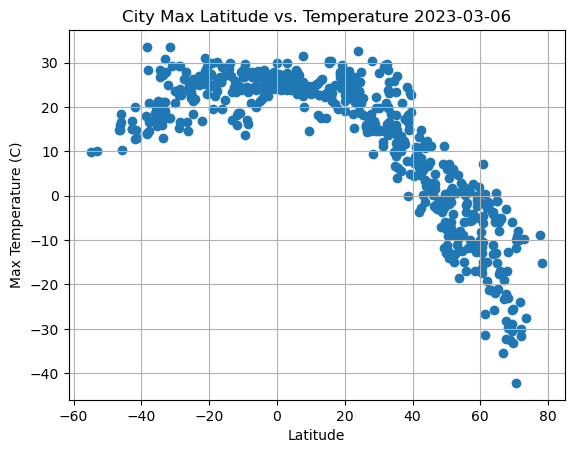

In [8]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df['Lat'], city_data_df['Max Temp'])
dt_string = city_data_df['Date'][0]
format = '%a %b %d %H:%M:%S %Y'

# Incorporate the other graph properties
plt.title(f'City Max Latitude vs. Temperature {datetime.strptime(dt_string, format).date()}')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()


#### Latitude Vs. Humidity

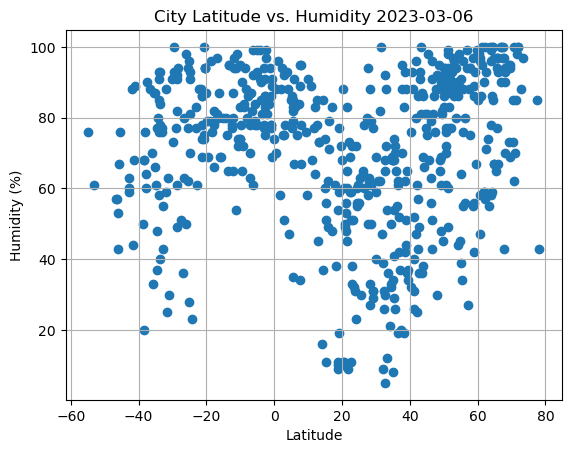

In [9]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df['Lat'], city_data_df['Humidity'])

# Incorporate the other graph properties
plt.title(f'City Latitude vs. Humidity {datetime.strptime(dt_string, format).date()}')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

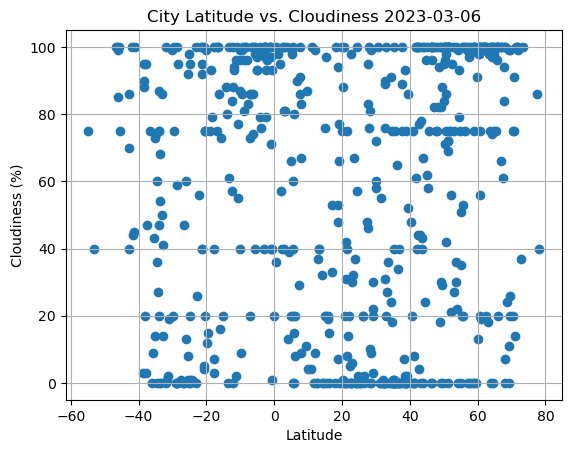

In [10]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df['Lat'], city_data_df['Cloudiness'])

# Incorporate the other graph properties
plt.title(f'City Latitude vs. Cloudiness {datetime.strptime(dt_string, format).date()}')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

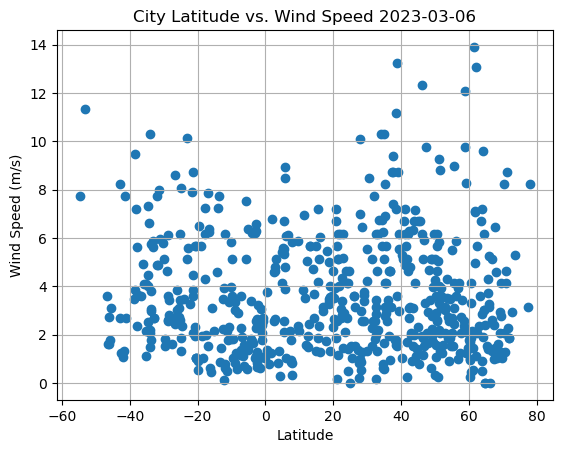

In [11]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df['Lat'], city_data_df['Wind Speed'])

# Incorporate the other graph properties
plt.title(f'City Latitude vs. Wind Speed {datetime.strptime(dt_string, format).date()}')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Define a function to create Linear Regression plots
def lin_reg(x_label, y_label, hemisphere, x_values, y_values):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    print(f'The r-value is: {rvalue}')
    plt.scatter(x_values, y_values)
    plt.plot(x_values, regress_values, 'r-')
    plt.annotate(line_eq, xy=(.05, .95), xycoords='axes fraction', va='center', fontsize = 15, color = 'red')
    plt.title(f'{y_label} vs. {x_label} Linear Regression Plot, {hemisphere} Hemisphere')
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    



In [13]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df['Lat'] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,port hardy,50.6996,-127.4199,7.10,70,75,5.66,CA,Mon Mar 6 17:32:47 2023
1,barrow,71.2906,-156.7887,-9.99,85,100,8.75,US,Mon Mar 6 17:31:24 2023
3,bethel,41.3712,-73.4140,9.87,31,0,5.66,US,Mon Mar 6 17:30:18 2023
4,la ronge,55.1001,-105.2842,-14.88,39,0,2.06,CA,Mon Mar 6 17:32:48 2023
5,albany,42.6001,-73.9662,5.23,49,77,4.79,US,Mon Mar 6 17:30:37 2023


In [14]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df['Lat']<0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,rio grande,-32.0350,-52.0986,25.06,88,100,7.73,BR,Mon Mar 6 17:32:47 2023
7,port alfred,-33.5906,26.8910,18.99,93,54,1.79,ZA,Mon Mar 6 17:32:48 2023
10,rikitea,-23.1203,-134.9692,26.95,77,100,10.12,PF,Mon Mar 6 17:32:49 2023
11,mataura,-46.1927,168.8643,14.71,43,99,1.60,NZ,Mon Mar 6 17:32:50 2023
12,ambilobe,-13.2000,49.0500,23.32,95,61,1.44,MG,Mon Mar 6 17:32:50 2023


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.8911373066419969


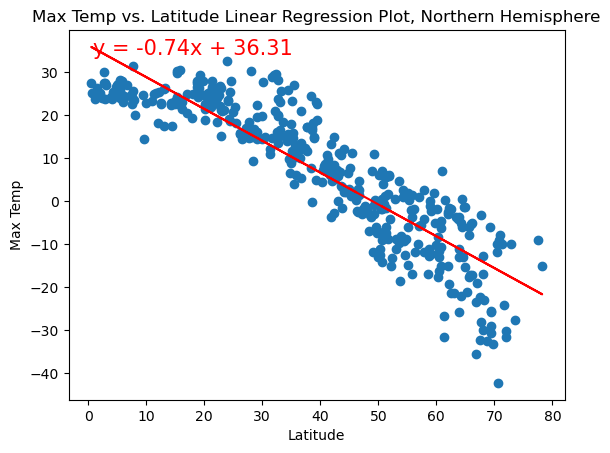

In [15]:
# Linear regression on Northern Hemisphere
lin_reg('Latitude', 'Max Temp', 'Northern', northern_hemi_df['Lat'], northern_hemi_df['Max Temp'])

The r-value is: 0.5398759139624825


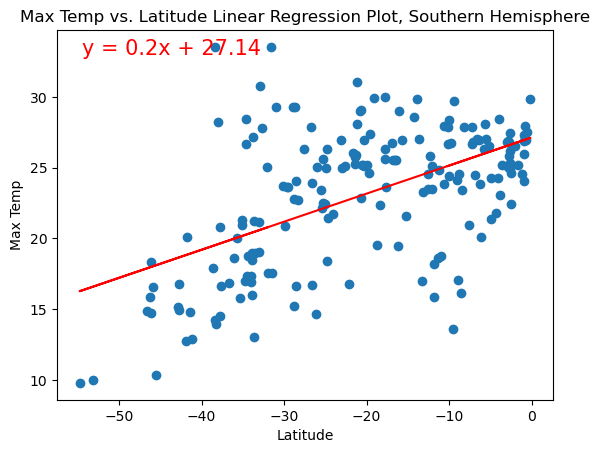

In [16]:
# Linear regression on Southern Hemisphere
lin_reg('Latitude', 'Max Temp', 'Southern', southern_hemi_df['Lat'], southern_hemi_df['Max Temp'])

**Discussion about the linear relationship:** 
1- In the North hemisphere, temprature drops as the latitude increases.
2- In the South hemisphere , temprature drops as we get further from the equator.
3- By comparing the r-values, the tempreture changes in the Northern hemisphere is more drastic than the Southern hemisphere. 

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.3144715856522725


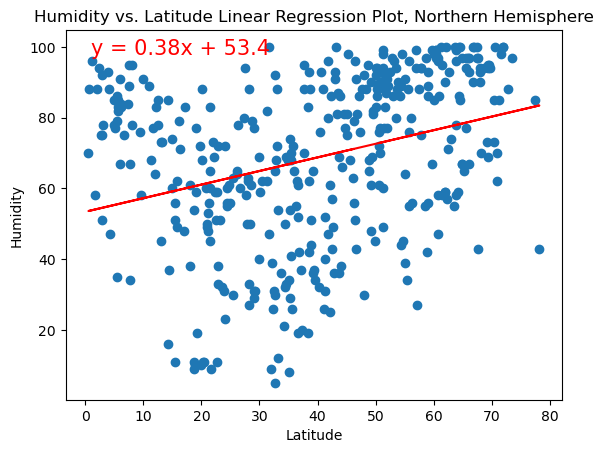

In [17]:
# Northern Hemisphere
lin_reg('Latitude', 'Humidity', 'Northern', northern_hemi_df['Lat'], northern_hemi_df['Humidity'])

The r-value is: 0.4133433010287061


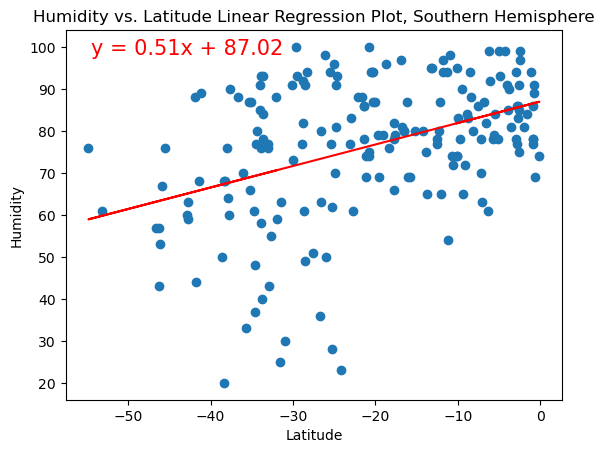

In [18]:
# Southern Hemisphere
lin_reg('Latitude', 'Humidity', 'Southern', southern_hemi_df['Lat'], southern_hemi_df['Humidity'])

**Discussion about the linear relationship:** 
1- In both hemispheres, the humidity percentage grows as we get closer to the equator.
2- The humidity changes in the Southern hemisphere is more drastic than the Northern hemisphere. 

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.2957694063140622


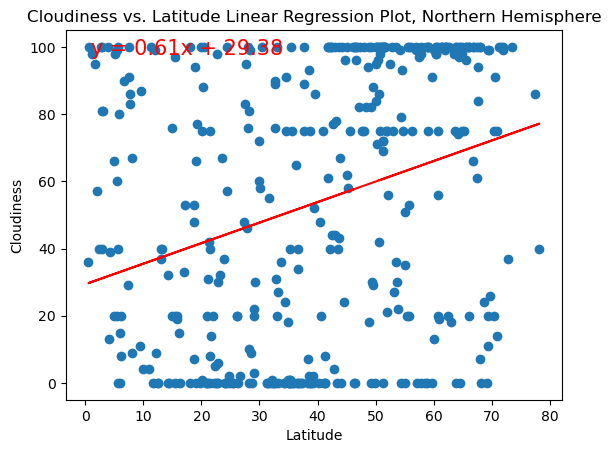

In [19]:
# Northern Hemisphere
lin_reg('Latitude', 'Cloudiness', 'Northern', northern_hemi_df['Lat'], northern_hemi_df['Cloudiness'])

The r-value is: 0.2773312804298314


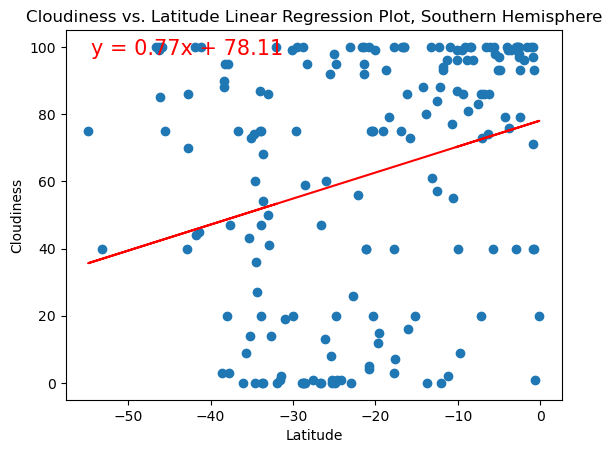

In [20]:
# Southern Hemisphere
lin_reg('Latitude', 'Cloudiness', 'Southern', southern_hemi_df['Lat'], southern_hemi_df['Cloudiness'])

**Discussion about the linear relationship:** 
1- In both hemispheres, the sky cludiness grows as we get closer to the equator.
2- The cludiness changes in the Southern hemisphere is more drastic than the Northern hemisphere. 

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: -0.03250697750666692


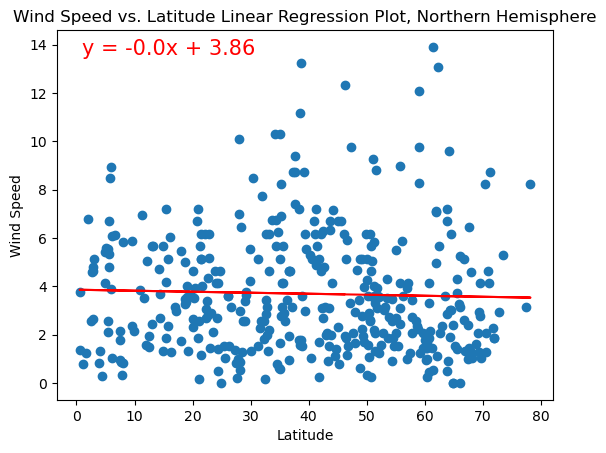

In [21]:
# Northern Hemisphere
lin_reg('Latitude', 'Wind Speed', 'Northern', northern_hemi_df['Lat'], northern_hemi_df['Wind Speed'])

The r-value is: -0.29491324413692704


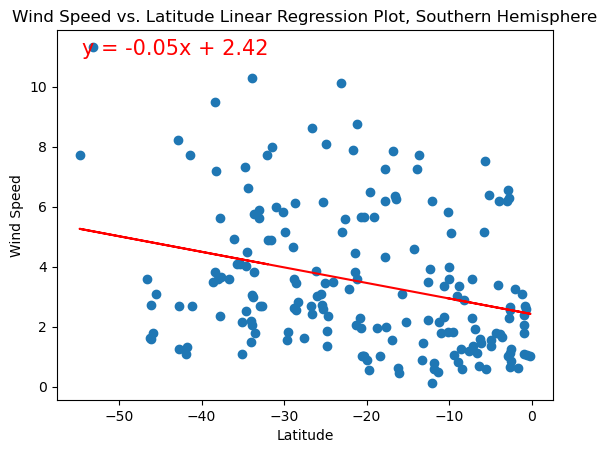

In [22]:
# Southern Hemisphere
lin_reg('Latitude', 'Wind Speed', 'Southern', southern_hemi_df['Lat'], southern_hemi_df['Wind Speed'])

**Discussion about the linear relationship:** 
1- In both hemispheres, the wind speed decreases as we get closer to the equator.
2- The wind speed changes in the Northern hemisphere is more moderate than the Southern hemisphere. 